In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install anesthetic
import os
os.chdir("/content/drive/MyDrive/project")

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import torch
import torch.nn as nn
import torch.distributions as dists
import torch.optim as optim
from torch.distributions import MultivariateNormal
from torch.distributions.distribution import Distribution
from np_utils import simple_data, curved_data, planck_des_data
from torch_utils import rotation_test, get_limits, TrainUtil
from tension_net import TensionNet, TensionNet1, TensionNet2, TensionNet3
from tension_quantify import GaussianKDE, BayesFactorKDE, BayesFactor

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
X1, X1_weights, X0, X0_weights, X_prior, params = planck_des_data()
weights = { "XA": X0_weights, "XB": X1_weights }
# X0_a = X0[:, 10:]
# X1_a = X1[:, 10:]
# X_prior_a = X_prior[:, 10:]
# params = params[10:]

In [56]:
start = time.time()
tension_R = TensionNet3(12)
criterion = BayesFactorKDE(device, n_points=1000, logsumexp=True)
optimizer = optim.Adam(tension_R.parameters(), lr=0.001)

train_util_R = TrainUtil(tension_R, optimizer, criterion, device)
losses_R = train_util_R.train(X0, X1, X_prior, weights=weights, n_iter=1000)
print("KDE time taken: ", time.time() - start)

/content/drive/MyDrive/project/torch_utils.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights["XA"] = torch.tensor(weights["XA"]).to(self.device).float()
/content/drive/MyDrive/project/torch_utils.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights["XB"] = torch.tensor(weights["XB"]).to(self.device).float()


KDE time taken:  50.14920735359192


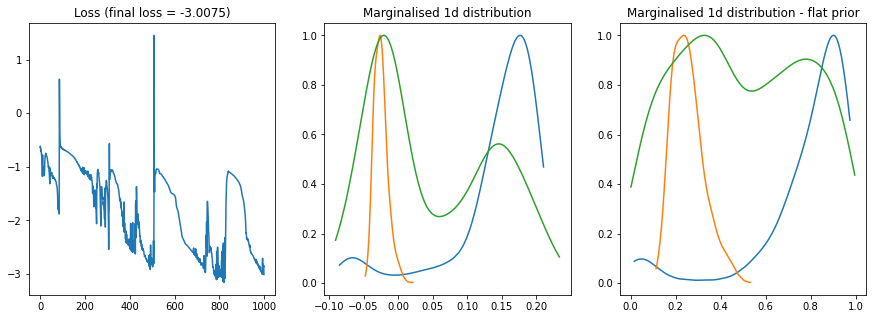

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

train_util_R.plot_loss(axs[0])
# train_util_R.visualise_coordinate(axs[1], idxs=(0, 1))
# train_util_R.visualise_tension(axs[2], idxs=(0, 1))
train_util_R.plot_marginalised_dists(axs[1])
train_util_R.plot_marginalised_dists(axs[2], flat_prior=True)

/content/drive/MyDrive/project/torch_utils.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


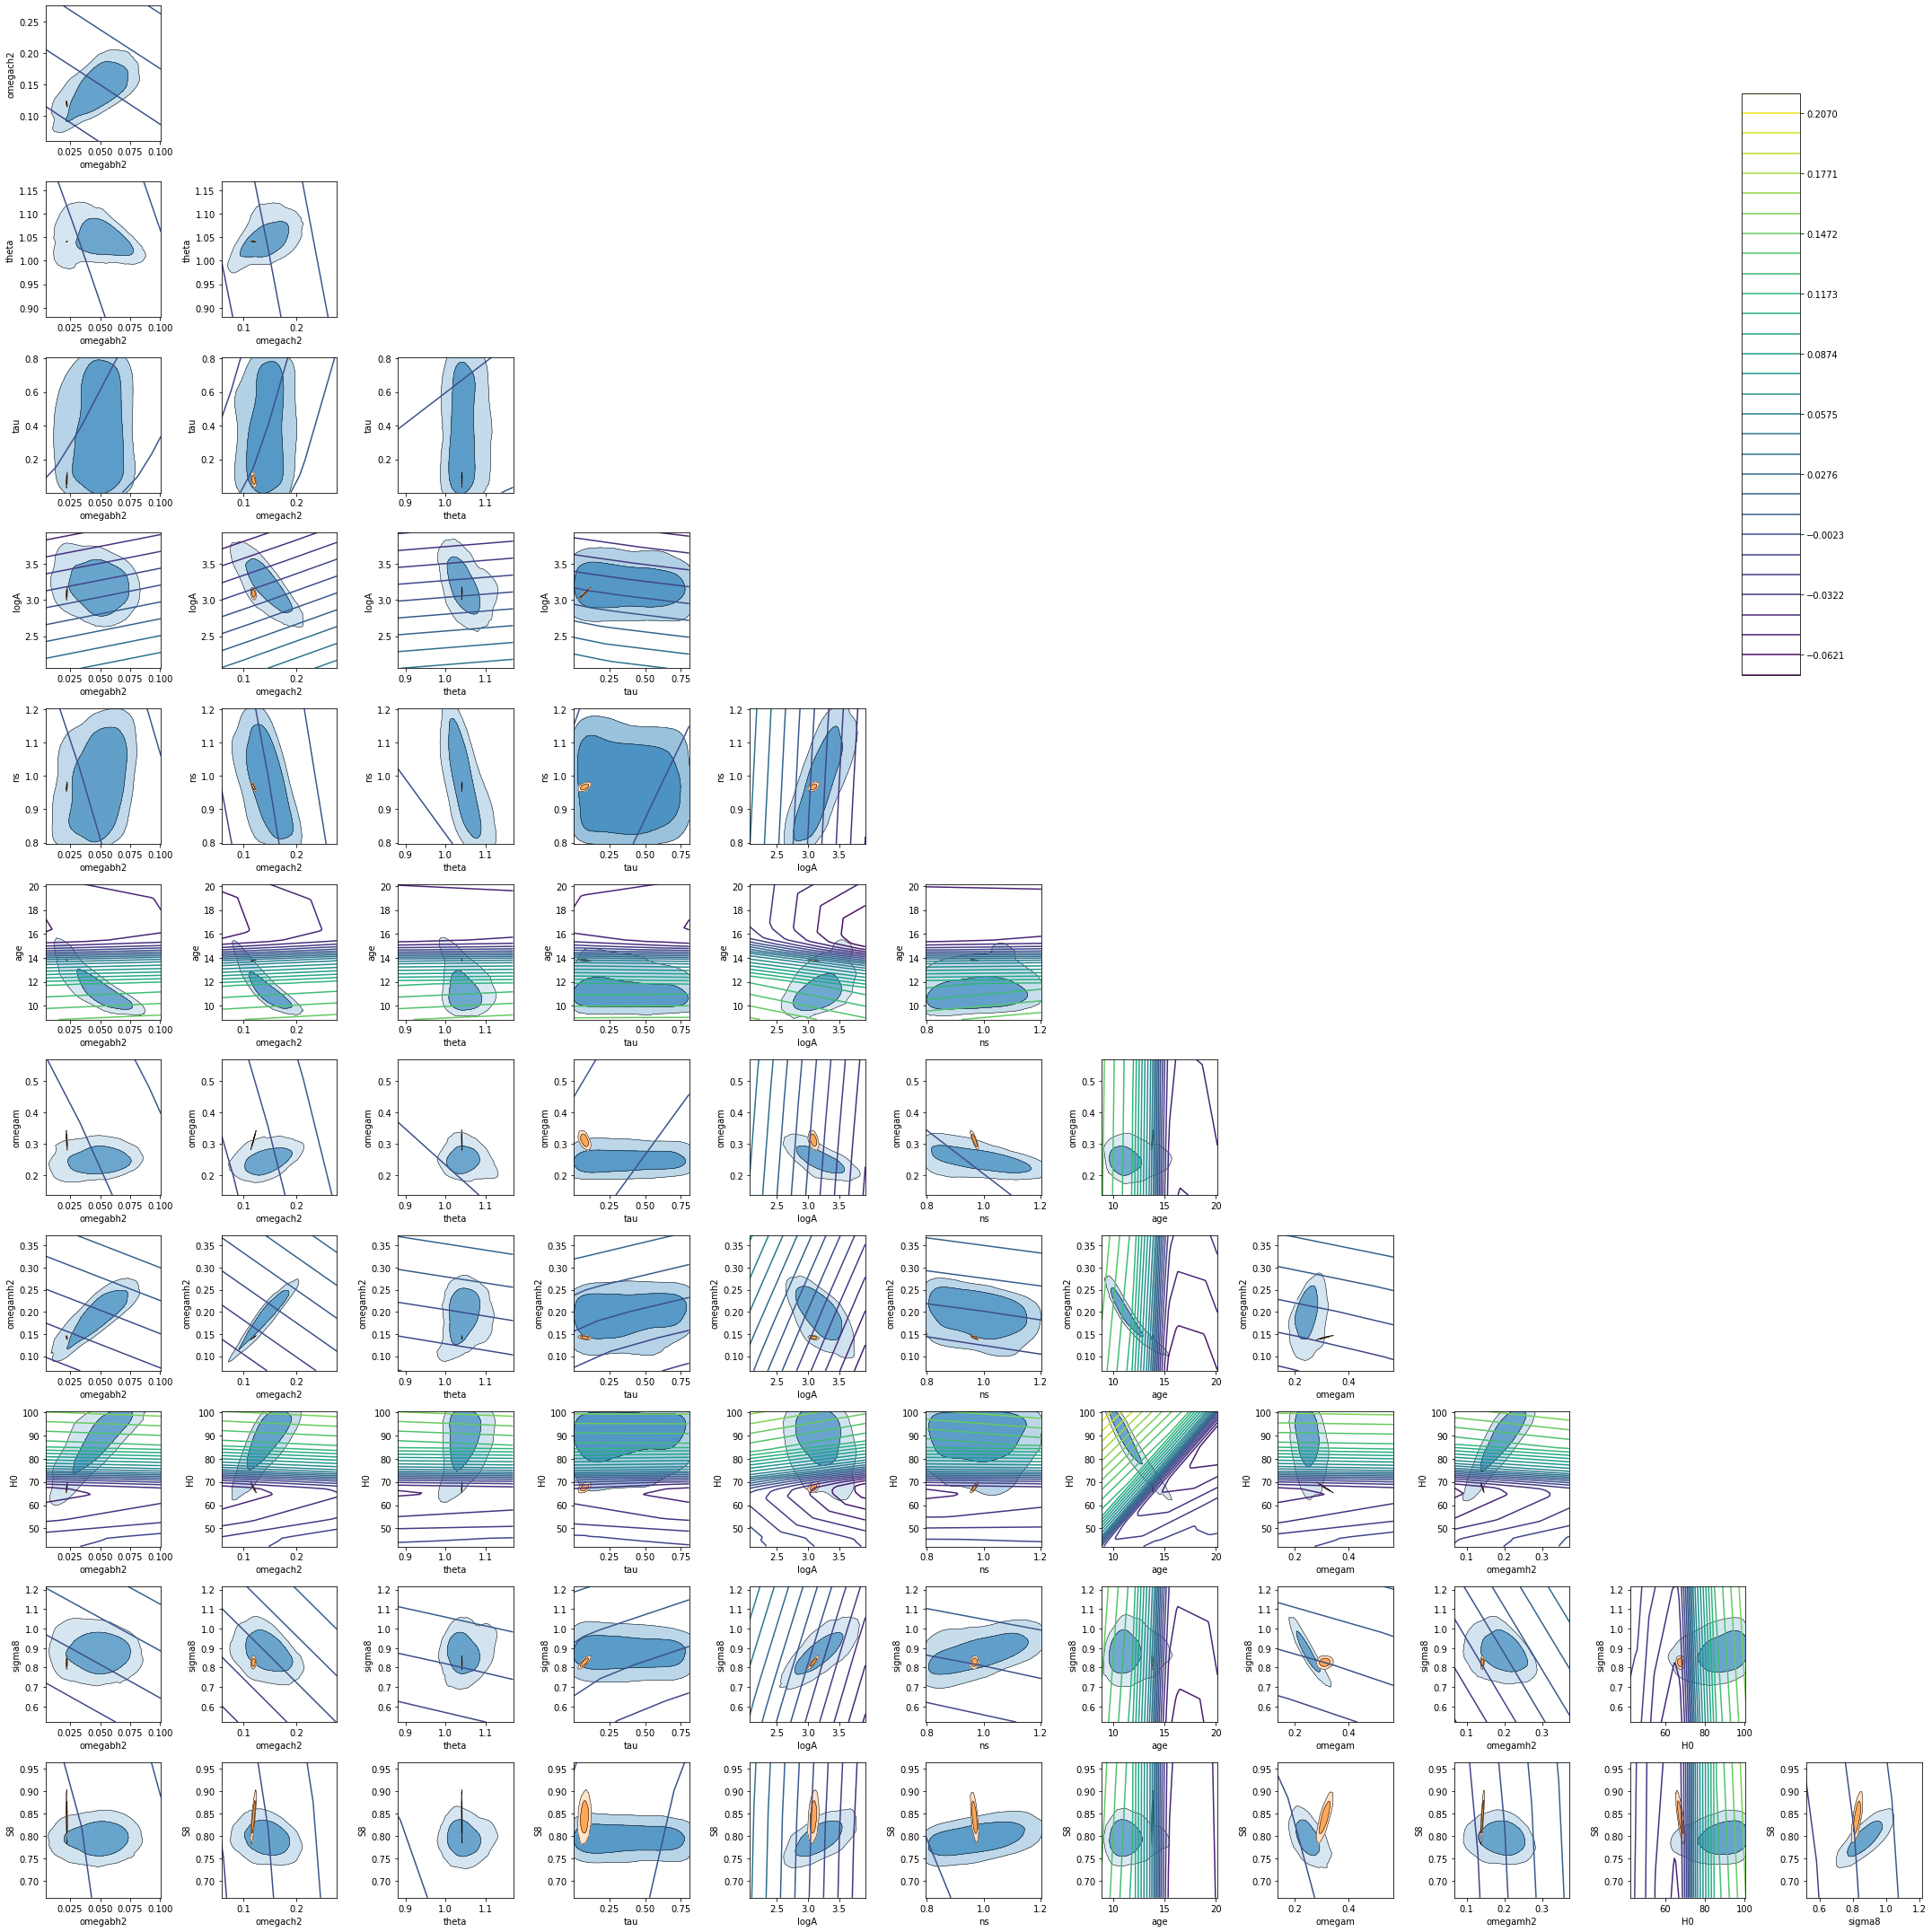

In [58]:
fig, axs = plt.subplots(11, 11, figsize=(30, 30))
train_util_R.visualise_coordinates_all(fig, axs, param_names=params,
                                       sync_levels=True)

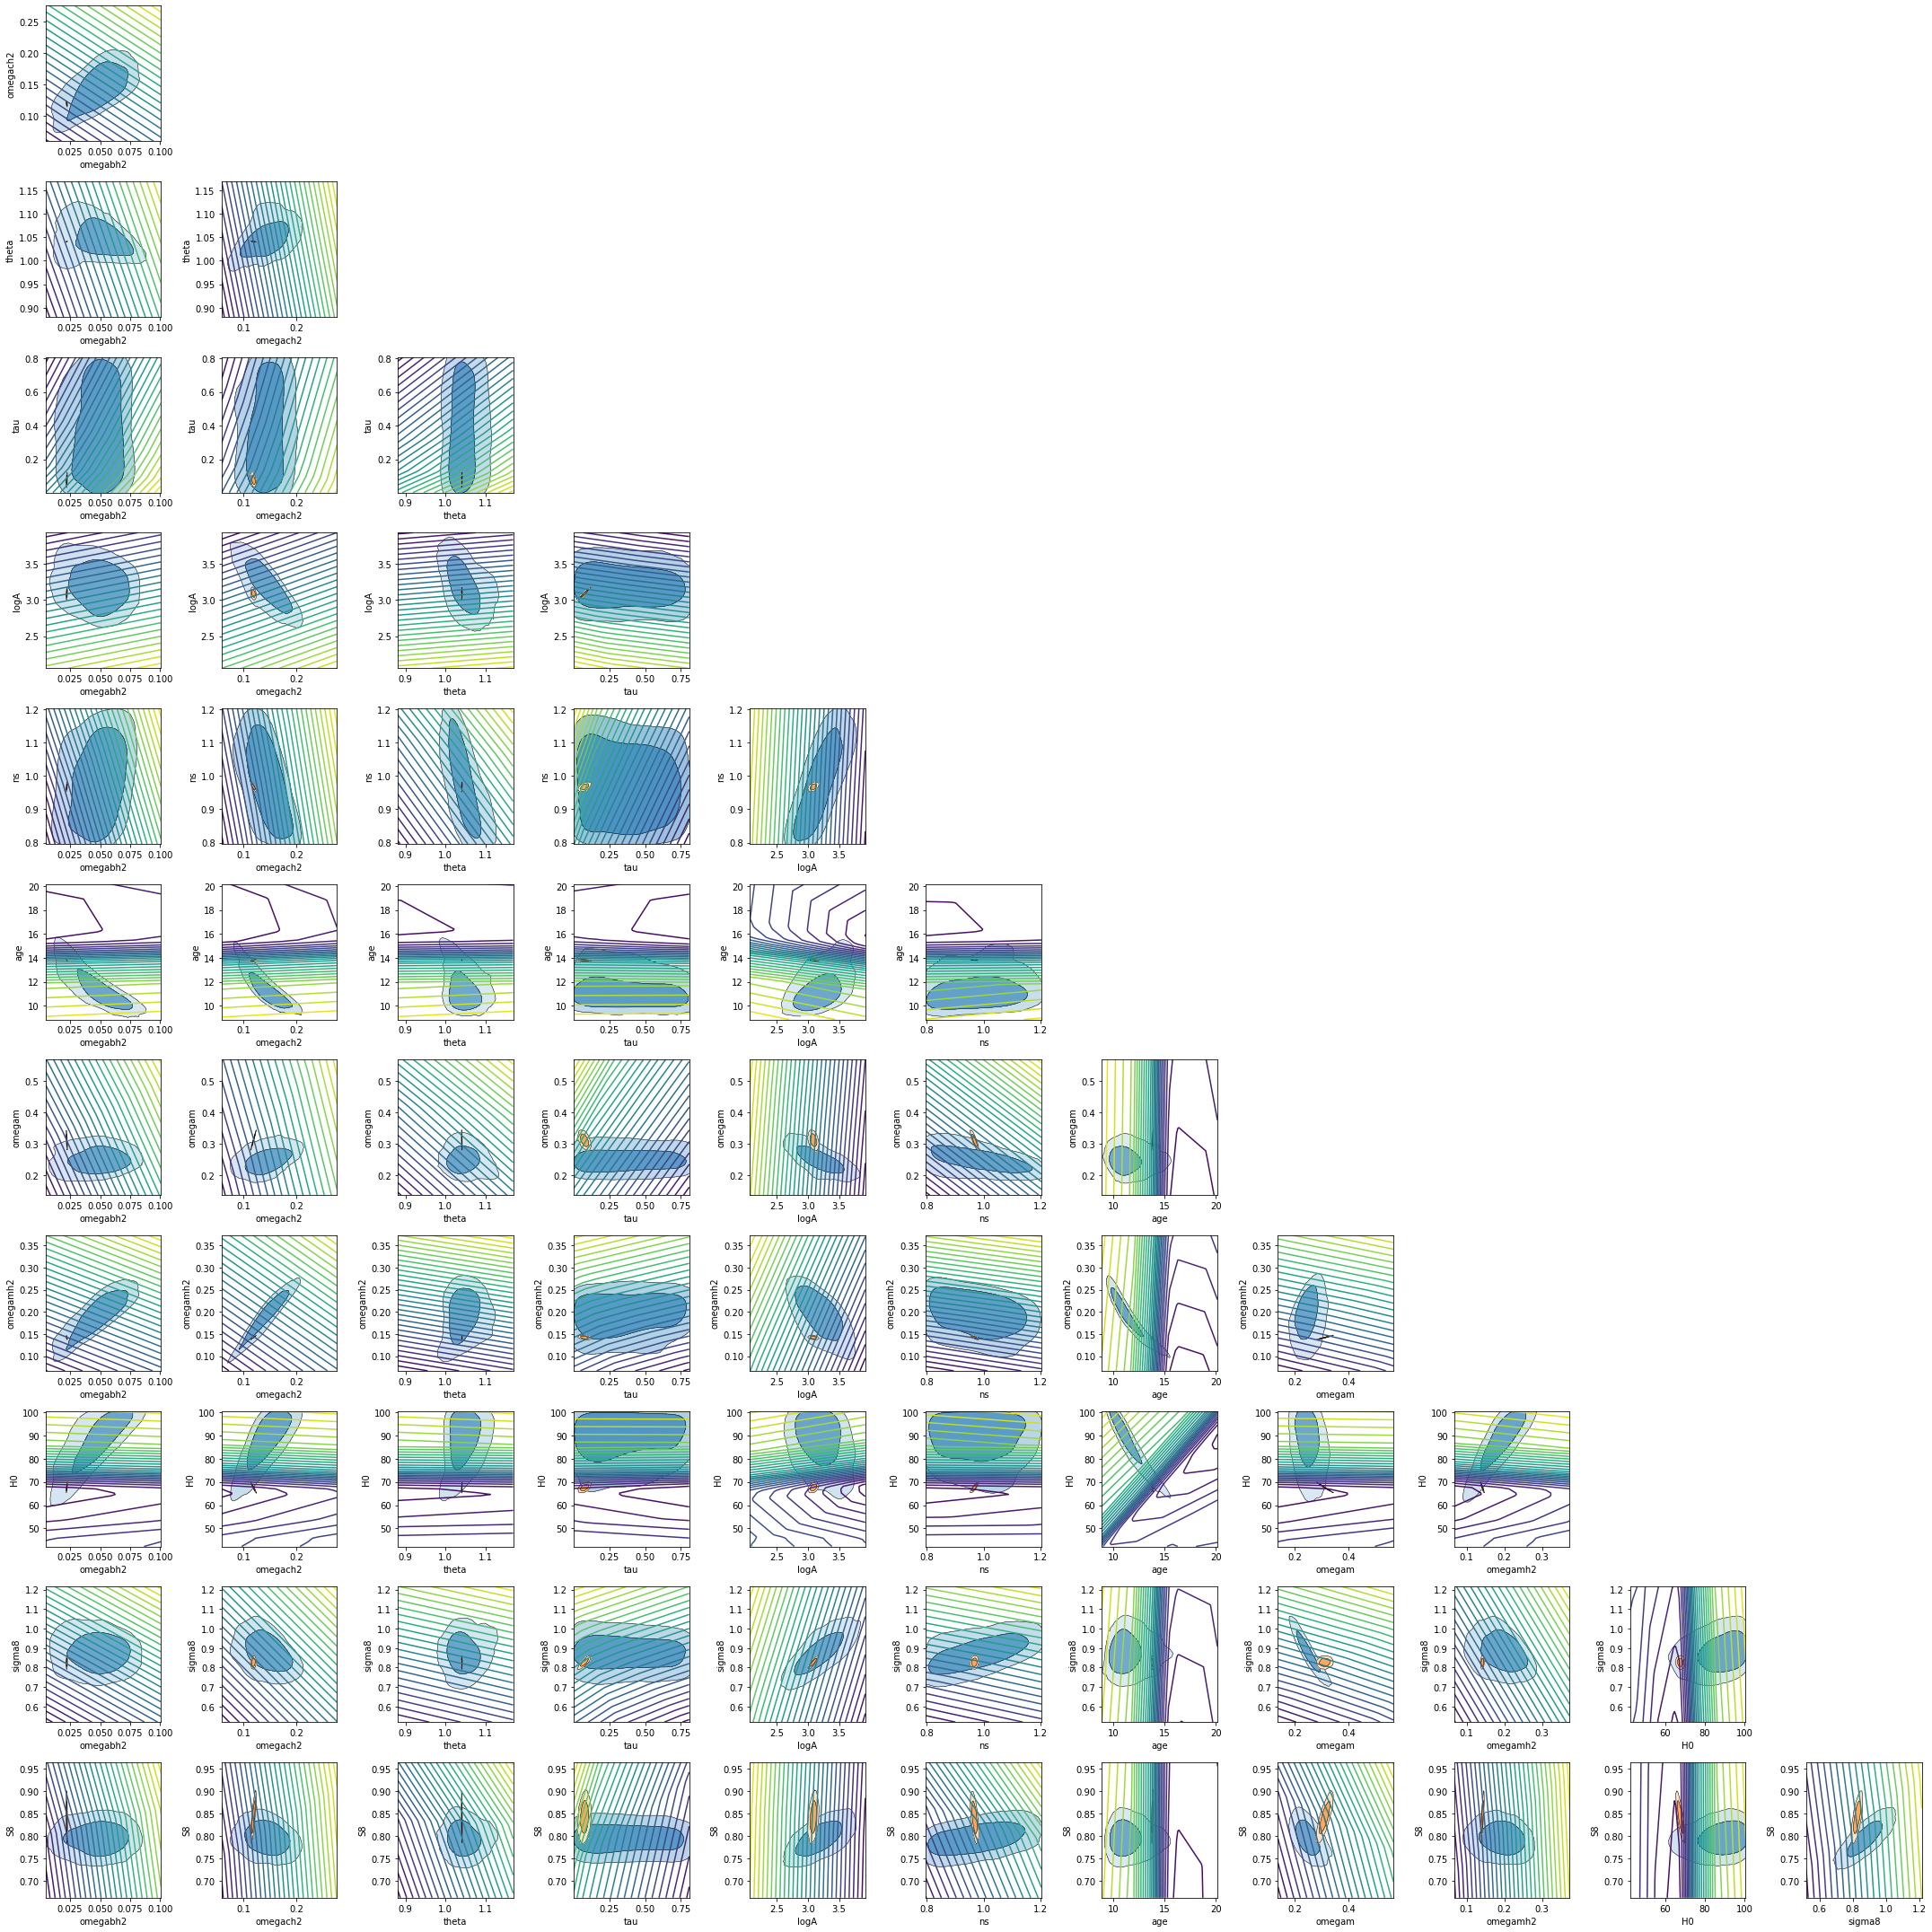

In [59]:
fig, axs = plt.subplots(11, 11, figsize=(30, 30))
train_util_R.visualise_coordinates_all(fig, axs, param_names=params,
                                       sync_levels=False)

In [50]:
start = time.time()
tension_R = TensionNet3(12)
criterion = BayesFactor(hist_type="gaussian", hist_param=1, n_dist_bins=100, 
                        n_prior_bins=50)
optimizer = optim.Adam(tension_R.parameters(), lr=0.001)

train_util_R = TrainUtil(tension_R, optimizer, criterion, device)
losses_R = train_util_R.train(X0, X1, X_prior, weights=weights, n_iter=2000)
print("Bins time taken: ", time.time() - start)

/content/drive/MyDrive/project/torch_utils.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights["XA"] = torch.tensor(weights["XA"]).to(self.device).float()
/content/drive/MyDrive/project/torch_utils.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights["XB"] = torch.tensor(weights["XB"]).to(self.device).float()


Bins time taken:  15.321948051452637


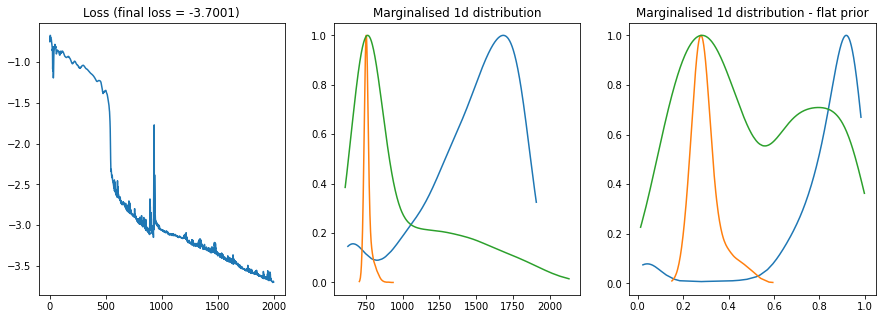

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

train_util_R.plot_loss(axs[0])
# train_util_R.visualise_coordinate(axs[1], idxs=(0, 1))
# train_util_R.visualise_tension(axs[2], idxs=(0, 1))
train_util_R.plot_marginalised_dists(axs[1])
train_util_R.plot_marginalised_dists(axs[2], flat_prior=True)

/content/drive/MyDrive/project/torch_utils.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


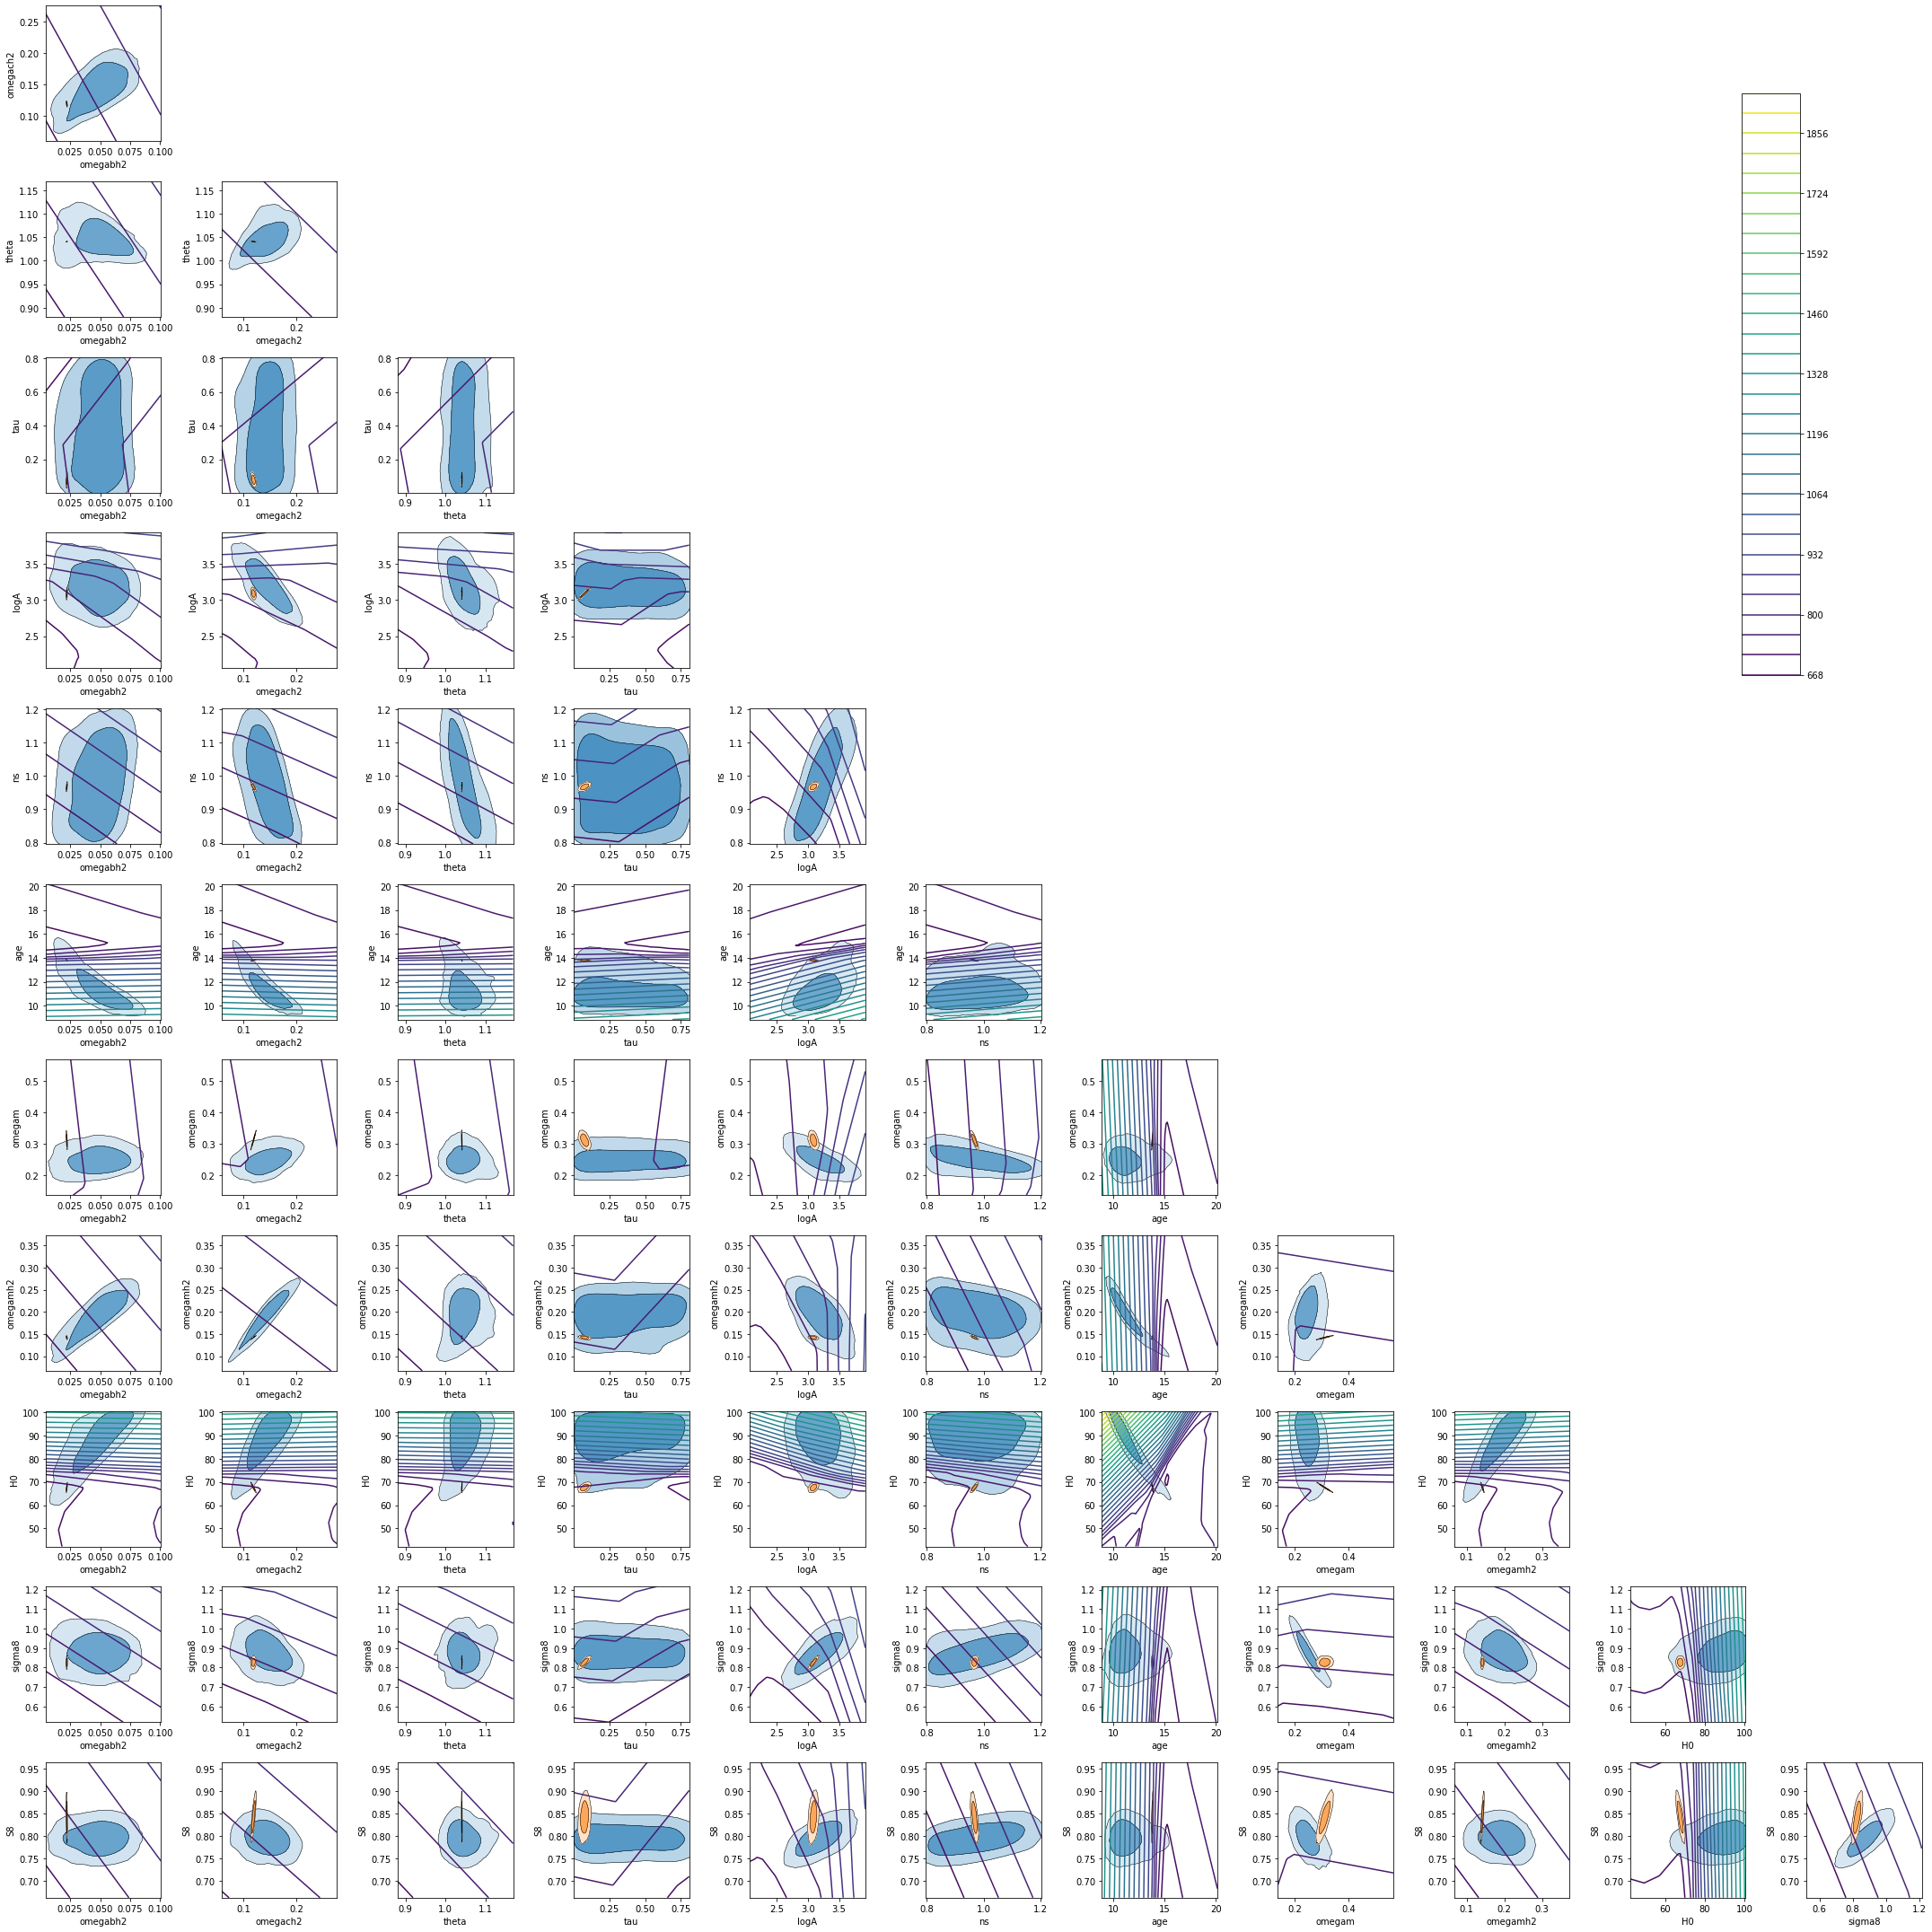

In [52]:
fig, axs = plt.subplots(11, 11, figsize=(30, 30))
train_util_R.visualise_coordinates_all(fig, axs, param_names=params,
                                       sync_levels=True)

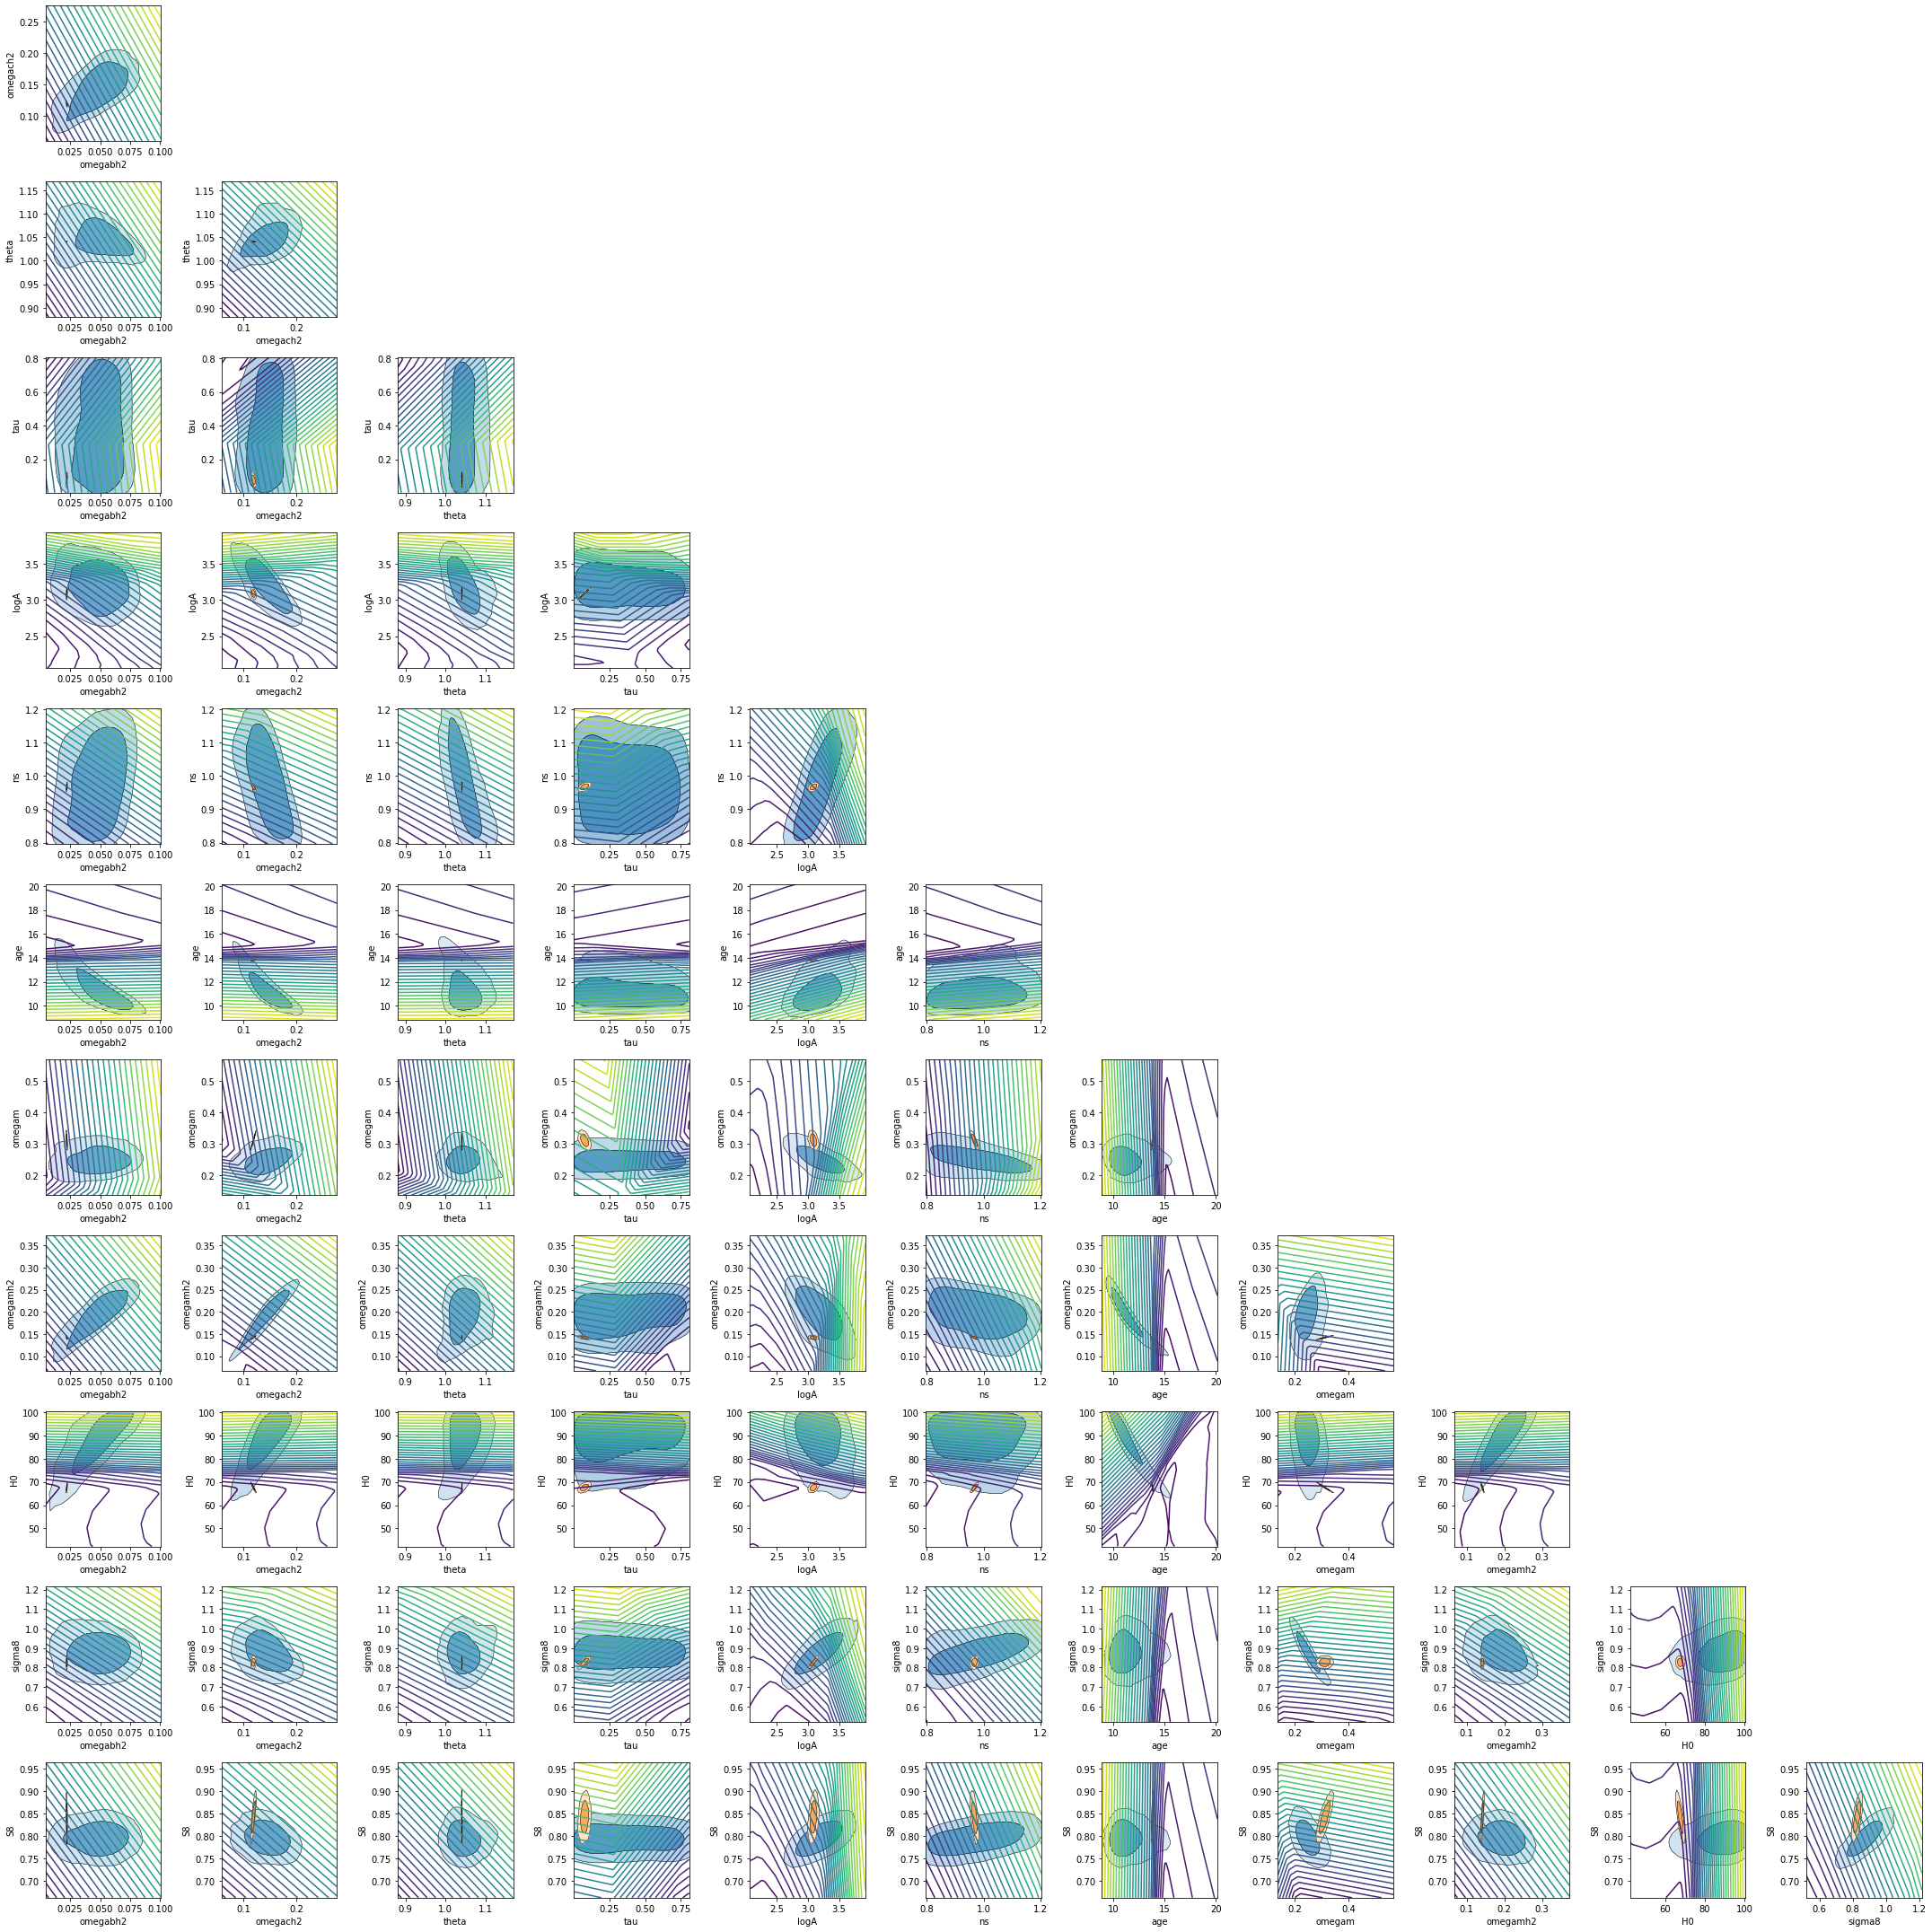

In [53]:
fig, axs = plt.subplots(11, 11, figsize=(30, 30))
train_util_R.visualise_coordinates_all(fig, axs, param_names=params,
                                       sync_levels=False)